<a href="https://colab.research.google.com/github/A01707504/Actividad-7-Regresi-n-Log-stica-/blob/main/Actividad_7_(Regresi%C3%B3n_Log%C3%ADstica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 7 (Regresión Logística)**

### Analítica de datos y herramientas de inteligencia artificial II (Gpo 501)

**Profesor:** Alfredo García Suárez

**Alumno:** Ricardo Saldaña Muñoz | A01707504

***Fecha:*** 22 de octubre de 2023

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Hecho esto cargamos el dataset que utilizaremos el cual tiene el nombre de cuentas_credicel.csv, y también definimos una opción con pd.set_option para que nos muestre todas las columnas del dataset y así poder visualizar cuales son los atributos significantes.

In [ ]:
df = pd.read_csv('/content/cuentas_credicel.csv')
pd.set_option('display.max_columns', None)
df.head()

<ipython-input-324-25c24eafba98>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/cuentas_credicel.csv')


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,agente_venta,dis_venta,status,fraude,empresa,inversion,pagos_realizados,reautorizacion,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,puntos,riesgo,score_buro,razones_buro,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,81,1169.0,2106,0.0,Sintia Verenice Tenorio Perez E,mic0437,2,0,microtec,0,0,0,NaN,NaN,NaN,0,0.0,0,NaN,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,225,1949.0,2925,0.0,Alvaro Rafael Pascual,mic015,2,0,microtec,0,0,0,NaN,NaN,NaN,0,0.0,0,NaN,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170,1469.0,2210,0.0,Sintia Verenice Tenorio Perez E,mic0437,3,0,microtec,0,0,0,NaN,NaN,Cancelado,0,0.0,0,NaN,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170,1469.0,2210,0.0,Luz Aylin Hernandez Lopez1,mic0748,2,0,microtec,0,0,0,NaN,NaN,NaN,0,0.0,0,NaN,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/2021 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,178,3224.0,6942,0.0,Sintia Verenice Tenorio Perez E,mic0437,1,0,microtec,0,0,0,05/03/2022 00:00,12/03/2022 00:00,Mora,0,0.0,0,NaN,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07


Asimismo para entender mejor el dataset mostramos la descripción de cada una de las columnas que se contienen en el dataset.

1. **folio**: Número de identificación único de la cuenta.
2. **tag**: Etiqueta o categoría asociada a la cuenta.
3. **folio_solicitud**: Número de identificación único de la solicitud relacionada con la cuenta.
4. **fecha**: Fecha en la que se creó la cuenta.
5. **marca**: La marca del producto o vehículo financiado.
6. **modelo**: El modelo del producto o vehículo financiado.
7. **plazo**: El período de tiempo en el que se acordó pagar el préstamo o financiamiento.
8. **precio**: El precio total del producto o vehículo financiado.
9. **enganche**: La cantidad inicial que el cliente pagó como anticipo.
10. **descuento**: Cualquier descuento aplicado al precio del producto o vehículo.
11. **semana**: Número de la semana en la que se creó la cuenta.
12. **monto_financiado**: La cantidad financiada después de restar el enganche y descuentos del precio total.
13. **costo_total**: El costo total del préstamo o financiamiento, incluyendo intereses y comisiones.
14. **monto_accesorios**: Monto adicional asociado a accesorios o extras en el producto o vehículo.
15. **agente_venta**: El agente de ventas responsable de la transacción.
16. **dis_venta**: Distrito de ventas relacionado con la cuenta.
17. **status**: Estado actual de la cuenta (por ejemplo, activa, inactiva, cancelada, etc.).
18. **fraude**: Indicador de si la cuenta está relacionada con un caso de fraude.
19. **empresa**: Nombre de la empresa o institución financiera involucrada en la cuenta.
20. **inversion**: Cantidad de inversión realizada en la cuenta.
21. **pagos_realizados**: Número de pagos realizados hasta la fecha.
22. **reautorizacion**: Indicador de si la cuenta ha requerido una reautorización.
23. **fecha_ultimo_pago**: Fecha del último pago realizado.
24. **fecha_pago_proximo**: Fecha estimada del próximo pago.
25. **status_cuenta**: Estado actual de la cuenta (puede ser similar a 'status', pero con más detalles).
26. **puntos**: Puntuación o puntos asociados a la cuenta (puede ser un puntaje de crédito).
27. **riesgo**: Nivel de riesgo asociado a la cuenta.
28. **score_buro**: Puntuación o puntaje de buró de crédito del cliente.
29. **razones_buro**: Razones que explican el puntaje de buró de crédito.
30. **porc_eng**: Porcentaje de enganche con respecto al precio del producto o vehículo.
31. **limite_credito**: Límite de crédito asignado al cliente.
32. **semana_actual**: Número de la semana actual en relación con la cuenta.
33. **cp_cliente**: Código postal del cliente.
34. **edad_cliente**: Edad del cliente.
35. **cd_cliente**: Ciudad del cliente.
36. **edo_cliente**: Estado del cliente.
37. **cd_venta**: Ciudad de la venta.
38. **edo_venta**: Estado de la venta.
39. **curp**: Clave Única de Registro de Población del cliente (en México).

Imprimimos la información del dataset para poder observar la cantidad de columnas, cantidad de filas y tipo de variable de cada atributo. De igual manera al observar la información del dataset, observamos que hay columnas que tenían valores faltantes por lo que es necesario generar un tratamiento de los datos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

# Limpieza

Al observar la cantidad de nulos existentes en las múltiples columnas, vemos que es necesario tratar esos nulos de manera que ya no haya valores faltantes. Para su tratamiento eliminaremos todas las columnas que no sean cuantitativas y es por eso que definimos un código para que se muestren las columnas con valores nulos, así como la cantidad de valores nulos con los que se cuentan.

In [ ]:
valores_nulos = df.isnull().sum()
columnas_nulos = valores_nulos[valores_nulos > 0]
columnas_nulos

empresa                 13
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         3314
razones_buro          7340
cp_cliente            7243
edad_cliente             9
edo_cliente              8
dtype: int64

Observamos que la columna 'limite_credito' tiene valores cuantitativos pero es de tipo object debido a que existen dos registros que contienen 'SD', es por eso que primero cambiamos este caractér por 0, y después convertimos la columna a tipo float.

In [ ]:
df['limite_credito'] = df['limite_credito'].replace('SD', 0)
df['limite_credito'] = df['limite_credito'].astype(float)

Llenamos los valores nulos de las variables cualitativas con la mediana.


In [ ]:
variables = ['empresa', 'fecha_ultimo_pago', 'fecha_pago_proximo', 'status_cuenta', 'razones_buro', 'cp_cliente', 'edo_cliente']
df[variables] = df[variables].bfill()
df[variables] = df[variables].ffill()

Eliminamos todas las columnas que sean de tipo object, y nos quedamos únicamente con las columnas que contengan valores cuantitativos.

In [ ]:
df_cn = df.select_dtypes(include=['int', 'float'])
df_cl = df.select_dtypes(include=['object'])

In [ ]:
#columnas_a_eliminar = df.select_dtypes(include=['object']).columns
#df1 = df.drop(columns=columnas_a_eliminar)

Observamos que hecho esto ya no contamos con valores nulos en ninguna de las columnas a excepción de la columna "edad_cliente", por lo que trataremos esos valores nulos con el promedio de todos los registros.

In [ ]:
df_cn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   precio            22735 non-null  float64
 3   enganche          22735 non-null  float64
 4   descuento         22735 non-null  float64
 5   semana            22735 non-null  int64  
 6   monto_financiado  22735 non-null  float64
 7   costo_total       22735 non-null  int64  
 8   monto_accesorios  22735 non-null  float64
 9   status            22735 non-null  int64  
 10  fraude            22735 non-null  int64  
 11  inversion         22735 non-null  int64  
 12  pagos_realizados  22735 non-null  int64  
 13  reautorizacion    22735 non-null  int64  
 14  puntos            22735 non-null  int64  
 15  riesgo            22735 non-null  float64
 16  score_buro        22735 non-null  int64 

In [ ]:
promedio_edad = df_cn['edad_cliente'].mean()
df_cn['edad_cliente'].fillna(promedio_edad, inplace=True)

Confirmamos de nuevo que ya no existan valores nulos, y podemos decir que ya no contamos con ninguno e ninguna de las columnas cuantitativas.

In [ ]:
valores_nulos = df_cn.isnull().sum()
columnas_nulos = valores_nulos[valores_nulos > 0]
columnas_nulos

Series([], dtype: int64)

Ya teniendo nuestro dataframe limpio, mostramos un boxplot para poder ver el comportamiento de los atributos.

<Figure size 1500x800 with 0 Axes>

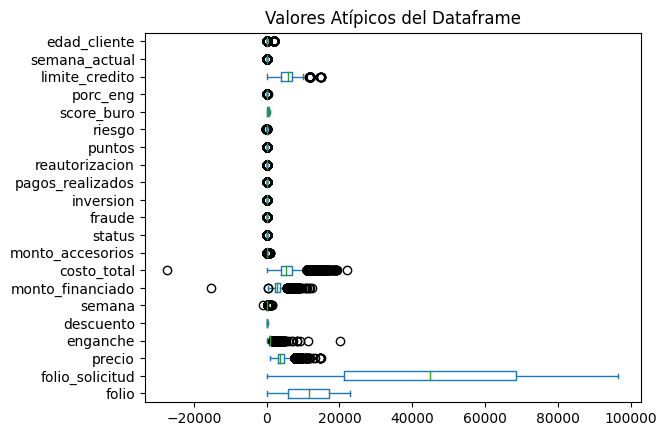

In [ ]:
fig = plt.figure(figsize = (15, 8))
df.plot(kind="box", vert = False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

Para poder tratar los valores atípicos utilizaremos el método de "Método Desviación Estándar" en el cual se encuentran los valores extremos.

In [ ]:
y=df_cn
Limite_Superior= y.mean() + 3* y.std()
Limite_Inferior= y.mean() - 3 * y.std()
print("Limite Superior Permitido", Limite_Superior)
print("Limite Inferior Permitido", Limite_Inferior)

Limite Superior Permitido folio                31323.107698
folio_solicitud     127723.906961
precio                8081.558082
enganche              2356.496845
descuento              478.215020
semana                 541.287392
monto_financiado      6366.317810
costo_total          12857.588246
monto_accesorios       191.260880
status                   2.611178
fraude                   0.864131
inversion                1.511599
pagos_realizados        39.306132
reautorizacion           0.578086
puntos                  48.354233
riesgo                  58.456322
score_buro            1142.021000
porc_eng                45.711306
limite_credito       12331.577603
semana_actual           64.380898
edad_cliente           422.315226
dtype: float64
Limite Inferior Permitido folio               -8301.055796
folio_solicitud    -36023.715538
precio                -87.484900
enganche             -503.622066
descuento            -321.263535
semana                -65.792692
monto_financiado     

Como siguiente paso obtenemos los datos, y convertimos los outliers en nulos en el Dataframe.

In [ ]:
df_cn= df_cn[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df_cn.head(20)

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
0,3,30,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0,40.02,5000.0,26.0,23.0
1,4,33,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0,35.01,6000.0,13.0,60.0
2,5,37,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,NaN,0.0,0,0.0,0.0,0.0,0.0,0,25.01,0.0,NaN,58.0
3,6,38,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0,25.01,7000.0,13.0,42.0
4,7,44,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0,25.01,7000.0,NaN,33.0
5,8,49,2999.0,750.0,0.0,156.0,2249.0,4056.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0,25.01,7000.0,26.0,38.0
6,9,50,2999.0,900.0,0.0,145.0,2099.0,3770.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0,30.01,6000.0,26.0,21.0
7,10,54,3999.0,1500.0,0.0,288.0,2499.0,3744.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0,37.51,7000.0,13.0,45.0
8,11,59,2889.0,1000.0,0.0,131.0,1889.0,3406.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0,34.61,7000.0,26.0,36.0
9,12,62,2999.0,750.0,0.0,156.0,2249.0,4056.0,0.0,1.0,0.0,0,15.0,0.0,0.0,0.0,0,25.01,7000.0,NaN,47.0


Después lo que se realizó fue reemplazar los valores atípicos que se encuentran ahora como valores nulos con el promedio.

In [ ]:
df_cn = df_cn.fillna(round(df_cn.mean(),1))
df_cn

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
0,3,30,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.00,0,40.02,5000.0,26.0,23.0
1,4,33,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.00,0,35.01,6000.0,13.0,60.0
2,5,37,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,1.2,0.0,0,0.0,0.0,0.0,0.00,0,25.01,0.0,20.2,58.0
3,6,38,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.00,0,25.01,7000.0,13.0,42.0
4,7,44,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.00,0,25.01,7000.0,20.2,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,1.0,0.0,0,0.0,0.0,10.0,27.40,469,8.87,10000.0,0.0,22.0
22731,22968,96479,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,1.0,0.0,0,0.0,0.0,9.0,19.00,502,29.49,5000.0,0.0,27.0
22732,22969,96442,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,1.0,0.0,0,0.0,0.0,11.0,26.65,459,23.76,4750.0,0.0,36.0
22733,22970,96536,3969.2,897.6,0.0,386.0,3043.8,5588.6,0.0,1.0,0.0,0,0.0,0.0,14.0,-17.35,699,28.56,7000.0,0.0,53.0


Después para comprobar lo anteriormente realizado desplegamos la información de nuestros dos dataframes para observar que ya no tienen ningún valor nulo en ninguno de los dos dataframes.

In [ ]:
df_cn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   precio            22735 non-null  float64
 3   enganche          22735 non-null  float64
 4   descuento         22735 non-null  float64
 5   semana            22735 non-null  float64
 6   monto_financiado  22735 non-null  float64
 7   costo_total       22735 non-null  float64
 8   monto_accesorios  22735 non-null  float64
 9   status            22735 non-null  float64
 10  fraude            22735 non-null  float64
 11  inversion         22735 non-null  int64  
 12  pagos_realizados  22735 non-null  float64
 13  reautorizacion    22735 non-null  float64
 14  puntos            22735 non-null  float64
 15  riesgo            22735 non-null  float64
 16  score_buro        22735 non-null  int64 

In [ ]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tag                 22735 non-null  object
 1   fecha               22735 non-null  object
 2   marca               22735 non-null  object
 3   modelo              22735 non-null  object
 4   plazo               22735 non-null  object
 5   agente_venta        22735 non-null  object
 6   dis_venta           22735 non-null  object
 7   empresa             22735 non-null  object
 8   fecha_ultimo_pago   22735 non-null  object
 9   fecha_pago_proximo  22735 non-null  object
 10  status_cuenta       22735 non-null  object
 11  razones_buro        22735 non-null  object
 12  cp_cliente          22735 non-null  object
 13  cd_cliente          22735 non-null  object
 14  edo_cliente         22735 non-null  object
 15  cd_venta            22735 non-null  object
 16  edo_venta           22

Hecho esto concatenamos nuestros dos dataframes.

In [ ]:
df = pd.concat([df_cl, df_cn], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tag                 22735 non-null  object 
 1   fecha               22735 non-null  object 
 2   marca               22735 non-null  object 
 3   modelo              22735 non-null  object 
 4   plazo               22735 non-null  object 
 5   agente_venta        22735 non-null  object 
 6   dis_venta           22735 non-null  object 
 7   empresa             22735 non-null  object 
 8   fecha_ultimo_pago   22735 non-null  object 
 9   fecha_pago_proximo  22735 non-null  object 
 10  status_cuenta       22735 non-null  object 
 11  razones_buro        22735 non-null  object 
 12  cp_cliente          22735 non-null  object 
 13  cd_cliente          22735 non-null  object 
 14  edo_cliente         22735 non-null  object 
 15  cd_venta            22735 non-null  object 
 16  edo_

# Regresión Logística

In [ ]:
df.head()

,tag,fecha,marca,modelo,plazo,agente_venta,dis_venta,empresa,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,razones_buro,cp_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
0,HDNAWQ3A,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,microtec,05/03/2022 00:00,12/03/2022 00:00,Cancelado,C1,72490,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02,3,30,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0,40.02,5000.0,26.0,23.0
1,M418YNR4,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,microtec,05/03/2022 00:00,12/03/2022 00:00,Cancelado,C1,72490,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07,4,33,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0,35.01,6000.0,13.0,60.0
2,SZ7V3NZT,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,microtec,05/03/2022 00:00,12/03/2022 00:00,Cancelado,C1,72490,TANTOYUCA,VER.,0,0,0,5,37,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,1.2,0.0,0,0.0,0.0,0.0,0.0,0,25.01,0.0,20.2,58.0
3,9I08UIQZ,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,microtec,05/03/2022 00:00,12/03/2022 00:00,Mora,C1,72490,AMXTLAN PUE,VER.,Zacatlan,Puebla,SAMJ790115MPLNRS02,6,38,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0,25.01,7000.0,13.0,42.0
4,JMF4LKYU,13/11/2021 16:10,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,microtec,05/03/2022 00:00,12/03/2022 00:00,Mora,C1,72490,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07,7,44,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0,25.01,7000.0,20.2,33.0


In [ ]:
conteo_valores = df['dis_venta'].value_counts()
conteo_valores

mic0912    526
svc001     432
mic014     398
mic015     381
svc003     316
          ... 
mai005       1
stl019       1
yvs036       1
lek016       1
RMC003       1
Name: dis_venta, Length: 585, dtype: int64

In [ ]:
df.corr()

<ipython-input-343-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
folio,1.000000,0.971332,0.089539,0.125603,0.134939,0.097617,0.070554,0.048342,0.105582,-0.401955,NaN,-0.139744,-0.462108,NaN,-0.120519,0.360565,0.548206,0.085404,-0.389241,-0.809617,-0.012752
folio_solicitud,0.971332,1.000000,0.090329,0.122568,0.131475,0.099369,0.072683,0.049955,0.094277,-0.391637,NaN,-0.130940,-0.453260,NaN,-0.136636,0.348446,0.527624,0.079580,-0.373411,-0.787954,-0.013639
precio,0.089539,0.090329,1.000000,0.690542,0.018582,0.611028,0.935647,0.838116,-0.024338,-0.097610,NaN,-0.009418,0.021131,NaN,0.072409,-0.042131,0.077478,-0.037848,0.071461,-0.007976,-0.078688
enganche,0.125603,0.122568,0.690542,1.000000,-0.025831,0.379107,0.515344,0.448240,-0.015719,-0.074212,NaN,-0.106344,-0.088180,NaN,-0.211252,0.300962,0.069650,0.550980,-0.363672,-0.085123,-0.106747
descuento,0.134939,0.131475,0.018582,-0.025831,1.000000,-0.019941,0.033970,0.050457,0.025154,-0.068609,NaN,0.243043,0.043343,NaN,-0.084649,0.044845,0.106815,-0.058823,-0.099430,-0.123154,-0.019187
semana,0.097617,0.099369,0.611028,0.379107,-0.019941,1.000000,0.602361,0.351682,-0.014543,0.140207,NaN,0.016371,-0.116870,NaN,0.084549,-0.071684,0.060466,-0.115531,0.097151,-0.174343,-0.027617
monto_financiado,0.070554,0.072683,0.935647,0.515344,0.033970,0.602361,1.000000,0.880544,-0.014844,-0.104128,NaN,0.031904,0.054574,NaN,0.164210,-0.173172,0.073016,-0.253541,0.215092,0.020533,-0.058117
costo_total,0.048342,0.049955,0.838116,0.448240,0.050457,0.351682,0.880544,1.000000,0.006631,-0.191657,NaN,0.026717,0.120742,NaN,0.154028,-0.170579,0.077757,-0.256799,0.216293,0.098423,-0.055271
monto_accesorios,0.105582,0.094277,-0.024338,-0.015719,0.025154,-0.014543,-0.014844,0.006631,1.000000,-0.041099,NaN,-0.022554,-0.055976,NaN,-0.028959,0.059309,0.061045,0.000023,-0.054168,-0.085508,0.003137
status,-0.401955,-0.391637,-0.097610,-0.074212,-0.068609,0.140207,-0.104128,-0.191657,-0.041099,1.000000,NaN,0.091192,0.296808,NaN,0.072987,-0.163089,-0.229747,-0.012792,0.157092,-0.003240,0.067626


## ***Análisis 1***
**Variable dependiente:** status_cuenta

**Variables independientes:** precio, semana, edad_cliente

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['precio', 'semana', 'edad_cliente']]
Var_Dep= df['status_cuenta']

In [ ]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['Corriente', 'Corriente', 'Corriente', ..., 'Corriente',
       'Corriente', 'Corriente'], dtype=object)

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[   0    0 1062    0    0]
 [   0    0   82    0    0]
 [   0    0 3203    0    3]
 [   0    0  636    0    0]
 [   0    0 1832    0    3]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision1 = precision_score(y_test, y_pred, average="macro", pos_label="yes")
print('Precisión del modelo:')
print(precision1)

Precisión del modelo:
0.1939985326485693


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud1 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud1)

Exactitud del modelo:
0.4700190587890339


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad1 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad1)

Sensibilidad del modelo:
0.20013982638139322


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef11 = f1_score(y_test, y_pred, average="macro", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef11)

Puntaje F1 del modelo:
0.12850333148839366


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


## ***Análisis 2***
**Variable dependiente:** inversion

**Variables independientes:** descuento, pagos_realizados, porc_eng

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['descuento', 'pagos_realizados', 'porc_eng']]
Var_Dep= df['inversion']

In [ ]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[4989  187]
 [1421  224]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision2 = precision_score(y_test, y_pred, average="macro", pos_label="yes")
print('Precisión del modelo:')
print(precision2)

Precisión del modelo:
0.6616636490277129


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud2 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud2)

Exactitud del modelo:
0.7642574402580267


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad2 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad2)

Sensibilidad del modelo:
0.5500209641882338


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef12 = f1_score(y_test, y_pred, average="macro", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef12)

Puntaje F1 del modelo:
0.5395553200192638


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


## ***Análisis 3***
**Variable dependiente:** marca

**Variables independientes:** precio, descuento, enganche

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['descuento', 'precio', 'enganche']]
Var_Dep= df['marca']

In [ ]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['Samsung', 'ZTE', 'Samsung', ..., 'Samsung', 'Samsung', 'Samsung'],
      dtype=object)

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    1   24    0    1    0    0    0   40]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    1
     0    0    0    0   12    0    0    0    0    0   20]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    1   27    0    2    0    0    0   42]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    5   83    0    1    0    0    0   21]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    1    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    2]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0   

In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision3 = precision_score(y_test, y_pred, average="macro", pos_label="yes")
print('Precisión del modelo:')
print(precision3)

Precisión del modelo:
0.08660894787306


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud3 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud3)

Exactitud del modelo:
0.4493476029907638


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad3 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad3)

Sensibilidad del modelo:
0.07754858004209984


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef13 = f1_score(y_test, y_pred, average="macro", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef13)

Puntaje F1 del modelo:
0.06424087854173748


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


## ***Análisis 4***
**Variable dependiente:** plazo

**Variables independientes:** descuento, enganche, precio

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['descuento', 'enganche', 'precio']]
Var_Dep= df['plazo']

In [ ]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['26S', '26S', '26S', ..., '26S', '26S', '26S'], dtype=object)

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[  66 1791   73    0]
 [  26 3010  131    0]
 [   2 1435  159    0]
 [   2  111   15    0]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision4 = precision_score(y_test, y_pred, average="macro", pos_label="yes")
print('Precisión del modelo:')
print(precision4)

Precisión del modelo:
0.39559367974121007


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud4 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud4)

Exactitud del modelo:
0.4742706348042809


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad4 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad4)

Sensibilidad del modelo:
0.2710618055652341


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef14 = f1_score(y_test, y_pred, average="macro", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef14)

Puntaje F1 del modelo:
0.21474974251729056


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


## ***Análisis 5***
**Variable dependiente:** empresa

**Variables independientes:** porc_eng, monto_accesorios, precio

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['porc_eng', 'monto_accesorios', 'precio']]
Var_Dep= df['empresa']

In [ ]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['servicel', 'servicel', 'microtec', ..., 'microtec', 'microtec',
       'microtec'], dtype=object)

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision5 = precision_score(y_test, y_pred, average="macro", pos_label="yes")
print('Precisión del modelo:')
print(precision5)

Precisión del modelo:
0.022344985631037116


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud5 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud5)

Exactitud del modelo:
0.48717196891951325


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad5 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad5)

Sensibilidad del modelo:
0.02953336669353902


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef15 = f1_score(y_test, y_pred, average="macro", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef15)

Puntaje F1 del modelo:
0.02511745857061589


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


## ***Análisis 6***
**Variable dependiente:** razones_buro

**Variables independientes:** edad_cliente, score_buro, limite_credito

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['edad_cliente', 'score_buro', 'limite_credito']]
Var_Dep= df['razones_buro']

In [ ]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['K0,J0,E2,D8', 'K0,J0,E2,D8', 'C4', ..., 'C4', 'C4', 'K0,J0,E2,D8'],
      dtype=object)

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision6 = precision_score(y_test, y_pred, average="weighted", pos_label="yes")
print('Precisión del modelo:')
print(precision6)

Precisión del modelo:
0.33819251907286846


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud6 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud6)

Exactitud del modelo:
0.4295557836094414


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad6 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad6)

Sensibilidad del modelo:
0.011105142411711361


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef16 = f1_score(y_test, y_pred, average="weighted", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef16)

Puntaje F1 del modelo:
0.3658358501293558


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


## ***Análisis 7***
**Variable dependiente:** modelo

**Variables independientes:** porc_eng, descuento, precio

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['porc_eng', 'descuento', 'precio']]
Var_Dep= df['modelo']

In [ ]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['BLADE A3 2020 Gris', 'A03', 'A32', ..., 'A03', 'A03', 'A03s'],
      dtype=object)

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision7 = precision_score(y_test, y_pred, average="weighted", pos_label="yes")
print('Precisión del modelo:')
print(precision7)

Precisión del modelo:
0.12503925654779058


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud7 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud7)

Exactitud del modelo:
0.24175340859111566


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad7 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad7)

Sensibilidad del modelo:
0.020880454233443167


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef17 = f1_score(y_test, y_pred, average="weighted", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef17)

Puntaje F1 del modelo:
0.1537472133236204


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


## ***Análisis 8***
**Variable dependiente:** cd_cliente

**Variables independientes:** semana, riesgo, porc_eng

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['semana', 'riesgo', 'porc_eng']]
Var_Dep= df['cd_cliente']

In [ ]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['PUEBLA', 'PUEBLA', 'PUEBLA', ..., 'PUEBLA', 'PUEBLA', 'PUEBLA'],
      dtype=object)

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision8 = precision_score(y_test, y_pred, average="weighted", pos_label="yes")
print('Precisión del modelo:')
print(precision8)

Precisión del modelo:
0.010164599266803862


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud8 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud8)

Exactitud del modelo:
0.09368127840492596


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad8 = recall_score(y_test, y_pred, average="micro", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad8)

Sensibilidad del modelo:
0.09368127840492596


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef18 = f1_score(y_test, y_pred, average="weighted", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef18)

Puntaje F1 del modelo:
0.01759425248289334


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


## ***Análisis 9***
**Variable dependiente:** edo_cliente

**Variables independientes:** monto_financiado, semana_actual, score_buro

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['monto_financiado', 'semana_actual', 'score_buro']]
Var_Dep= df['edo_cliente']

In [ ]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array([' PUE.', ' PUE.', 'YUC', ..., 'YUC', ' PUE.', 'PUE'], dtype=object)

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision9 = precision_score(y_test, y_pred, average="weighted", pos_label="yes")
print('Precisión del modelo:')
print(precision9)

Precisión del modelo:
0.1251401635293862


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud9 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud9)

Exactitud del modelo:
0.24365928749450227


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad9 = recall_score(y_test, y_pred, average="weighted", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad9)

Sensibilidad del modelo:
0.24365928749450227


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef19 = f1_score(y_test, y_pred, average="weighted", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef19)

Puntaje F1 del modelo:
0.1467689494457007


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


## ***Análisis 10***
**Variable dependiente:** dis_venta

**Variables independientes:** monto_financiado, precio, score_buro

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['monto_financiado', 'precio', 'score_buro']]
Var_Dep= df['dis_venta']

In [ ]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['mic0912', 'svc001', 'svc001', ..., 'mic0912', 'svc001', 'mic0912'],
      dtype=object)

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision10 = precision_score(y_test, y_pred, average="micro", pos_label="yes")
print('Precisión del modelo:')
print(precision10)

Precisión del modelo:
0.026682304647412402


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud10 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud10)

Exactitud del modelo:
0.026682304647412402


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad10 = recall_score(y_test, y_pred, average="macro", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad10)

Sensibilidad del modelo:
0.003127680226186578


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef110 = f1_score(y_test, y_pred, average="micro", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef110)

Puntaje F1 del modelo:
0.026682304647412402


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


## Tabla de Coeficientes

In [ ]:
resumen = pd.DataFrame()
variable_dependiente = ['status_cuenta', 'inversion', 'marca', 'plazo', 'empresa', 'razones_buro', 'modelo', 'cd_cliente', 'edo_cliente', 'dis_venta' ]
precision = [precision1, precision2, precision3, precision4, precision5, precision6, precision7, precision8,
             precision9, precision10]
exactitud = [exactitud1, exactitud2, exactitud3, exactitud4, exactitud5, exactitud6, exactitud7, exactitud8,
             exactitud9, exactitud10]
sensibilidad = [sensibilidad1, sensibilidad2, sensibilidad3, sensibilidad4, sensibilidad5, sensibilidad6, sensibilidad7,
                sensibilidad8, sensibilidad9, sensibilidad10]

resumen['Variable Dependiente'] = variable_dependiente
resumen['Precisión'] = precision
resumen['Exactitud'] = exactitud
resumen['Sensibilidad'] = sensibilidad

resumen

,Variable Dependiente,Precisión,Exactitud,Sensibilidad
0,status_cuenta,0.193999,0.470019,0.200140
1,inversion,0.661664,0.764257,0.550021
2,marca,0.000283,0.021111,0.077549
3,plazo,0.022345,0.474271,0.271062
4,empresa,0.022345,0.487172,0.029533
5,razones_buro,0.338193,0.429556,0.011105
6,modelo,0.125039,0.241753,0.020880
7,cd_cliente,0.010165,0.093681,0.093681
8,edo_cliente,0.125140,0.243659,0.243659
9,dis_venta,0.026682,0.026682,0.003128
